In [1]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    document.body.style.fontFamily='Palatino';
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

# The Sparks Foundation
## Data Science and Business Analytics

## TASK-4   Exploratory Data Analysis on dataset SampleSuperstore 
### Author - Aditya Naranje

## Importing required libraries and dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( action = "ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [3]:
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
print(data.shape)
for i in data.columns:
    print("{} = {}".format(i,data[i].nunique()))

(9994, 13)
Ship Mode = 4
Segment = 3
Country = 1
City = 531
State = 49
Postal Code = 631
Region = 4
Category = 3
Sub-Category = 17
Sales = 5825
Quantity = 14
Discount = 12
Profit = 7287


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
data.drop(columns = ["Country"],inplace = True)

## Univariate Analysis.

### SHIP MODE

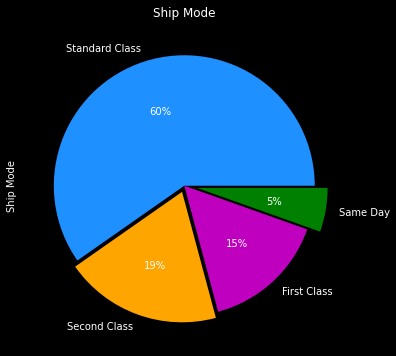

In [9]:
data["Ship Mode"].value_counts().plot(kind = "pie",title="Ship Mode",colors = ["dodgerblue","orange","m","g"],
                                      autopct='%1.0f%%',figsize=(6,6),explode = [0,0.05,0,0.1])
plt.show()

### SEGMENT

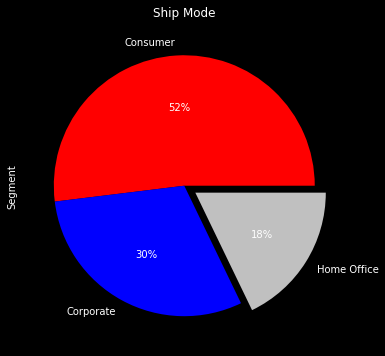

In [10]:
data["Segment"].value_counts().plot(kind = "pie",title="Ship Mode",colors = ["r","b","silver"],
                                      autopct='%1.0f%%',figsize=(6,6),explode = [0,0,0.1])
plt.show()

### CATEGORY

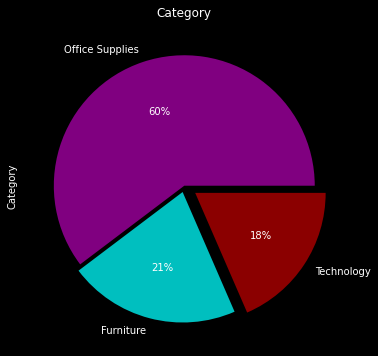

In [11]:
data["Category"].value_counts().plot(kind = "pie",title="Category",colors = ["purple","c","darkred"],
                                      autopct='%1.0f%%',figsize=(6,6),explode = [0,0.05,0.1])
plt.show()

### SUB-CATAGORY

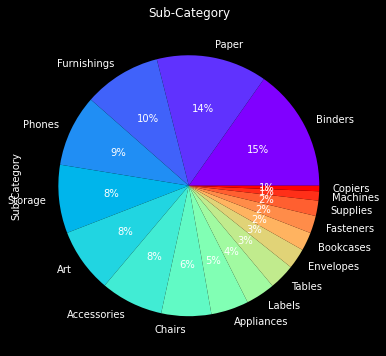

In [12]:
data["Sub-Category"].value_counts().plot(kind = "pie",title="Sub-Category",cmap="rainbow",
                                      autopct='%1.0f%%',figsize=(6,6))
plt.show()

### SALES

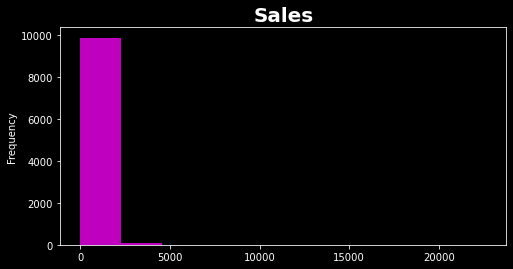

In [13]:
plt.figure(figsize=(8,4))
data["Sales"].plot(kind = "hist",color="m")
plt.title("Sales",fontsize=20,fontweight ='bold')
plt.show()

### QUANTITY

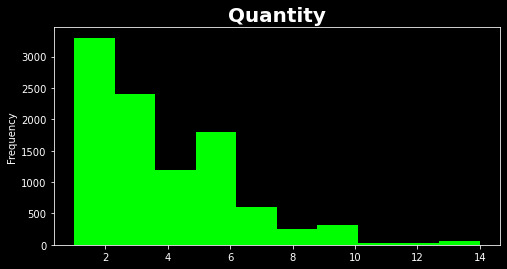

In [14]:
plt.figure(figsize=(8,4))
data["Quantity"].plot(kind = "hist",color="lime")
plt.title("Quantity",fontsize=20,fontweight ='bold')
plt.show()

### DISCOUNT

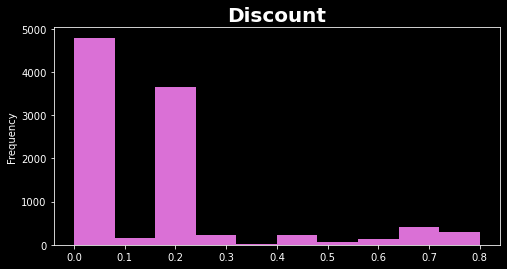

In [15]:
plt.figure(figsize=(8,4))
data["Discount"].plot(kind = "hist",color="orchid")
plt.title("Discount",fontsize=20,fontweight ='bold')
plt.show()

### PROFIT

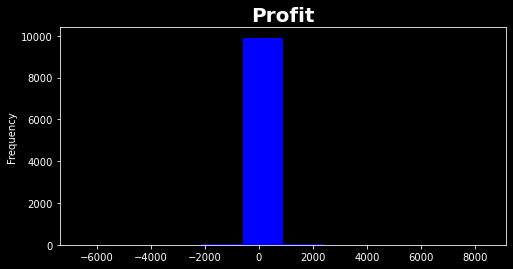

In [16]:
plt.figure(figsize=(8,4))
data["Profit"].plot(kind = "hist",color="b")
plt.title("Profit",fontsize=20,fontweight ='bold')
plt.show()

## Bivariate Analysis

### SALES VS DISCOUNT

<Figure size 504x504 with 0 Axes>

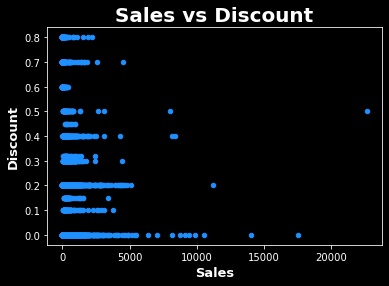

In [17]:
plt.figure(figsize=(7,7))
data.plot(kind = "scatter",x = "Sales",y="Discount",color="dodgerblue")
plt.title("Sales vs Discount",fontsize=20,fontweight ='bold')
plt.xlabel("Sales",fontweight ='bold',fontsize=13)
plt.ylabel("Discount",fontweight ='bold',fontsize=13)
plt.show()

### SALES VS QUANTITY

<Figure size 504x504 with 0 Axes>

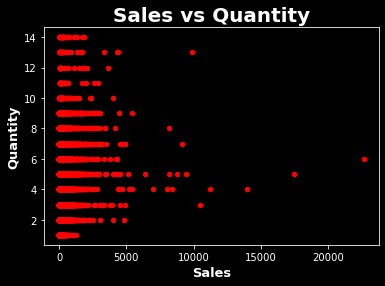

In [18]:
plt.figure(figsize=(7,7))
data.plot(kind = "scatter",x = "Sales",y="Quantity",color="r")
plt.title("Sales vs Quantity",fontsize=20,fontweight ='bold')
plt.xlabel("Sales",fontweight ='bold',fontsize=13)
plt.ylabel("Quantity",fontweight ='bold',fontsize=13)
plt.show()

### SALES VS PROFIT

<Figure size 504x504 with 0 Axes>

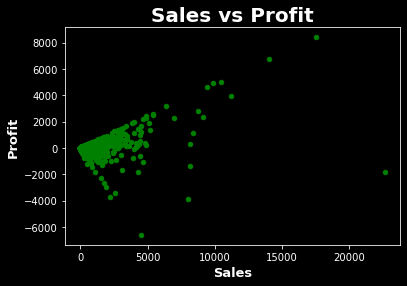

In [19]:
plt.figure(figsize=(7,7))
data.plot(kind = "scatter",x = "Sales",y="Profit",color="g")
plt.title("Sales vs Profit",fontsize=20,fontweight ='bold')
plt.xlabel("Sales",fontweight ='bold',fontsize=13)
plt.ylabel("Profit",fontweight ='bold',fontsize=13)
plt.show()

### QUANTITY VS DISCOUNT

<Figure size 504x504 with 0 Axes>

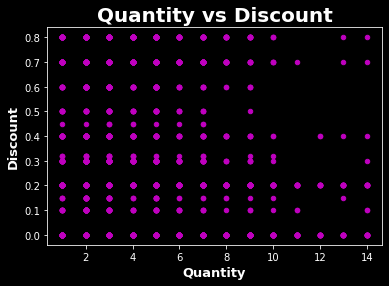

In [20]:
plt.figure(figsize=(7,7))
data.plot(kind = "scatter",x = "Quantity",y="Discount",color="m")
plt.title("Quantity vs Discount",fontsize=20,fontweight ='bold')
plt.xlabel("Quantity",fontweight ='bold',fontsize=13)
plt.ylabel("Discount",fontweight ='bold',fontsize=13)
plt.show()

### QUANTITY VS PROFIT

<Figure size 504x504 with 0 Axes>

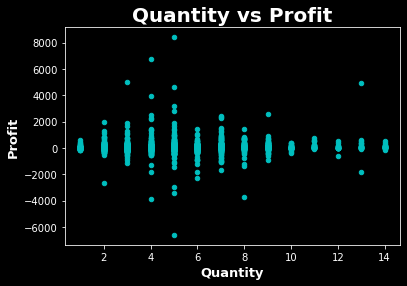

In [21]:
plt.figure(figsize=(7,7))
data.plot(kind = "scatter",x = "Quantity",y="Profit",color="c")
plt.title("Quantity vs Profit",fontsize=20,fontweight ='bold')
plt.xlabel("Quantity",fontweight ='bold',fontsize=13)
plt.ylabel("Profit",fontweight ='bold',fontsize=13)
plt.show()

### DISCOUNT VS PROFIT

<Figure size 504x504 with 0 Axes>

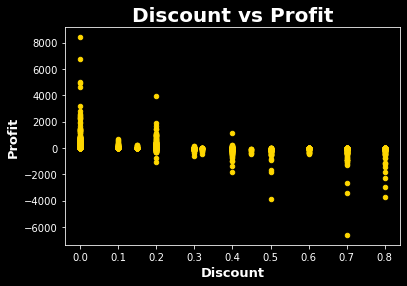

In [22]:
plt.figure(figsize=(7,7))
data.plot(kind = "scatter",x = "Discount",y="Profit",color="gold")
plt.title("Discount vs Profit",fontsize=20,fontweight ='bold')
plt.xlabel("Discount",fontweight ='bold',fontsize=13)
plt.ylabel("Profit",fontweight ='bold',fontsize=13)
plt.show()

In [23]:
numeric_data = ["Sales","Quantity","Discount","Profit"]

### Average of all quantative data in top 20 cities.

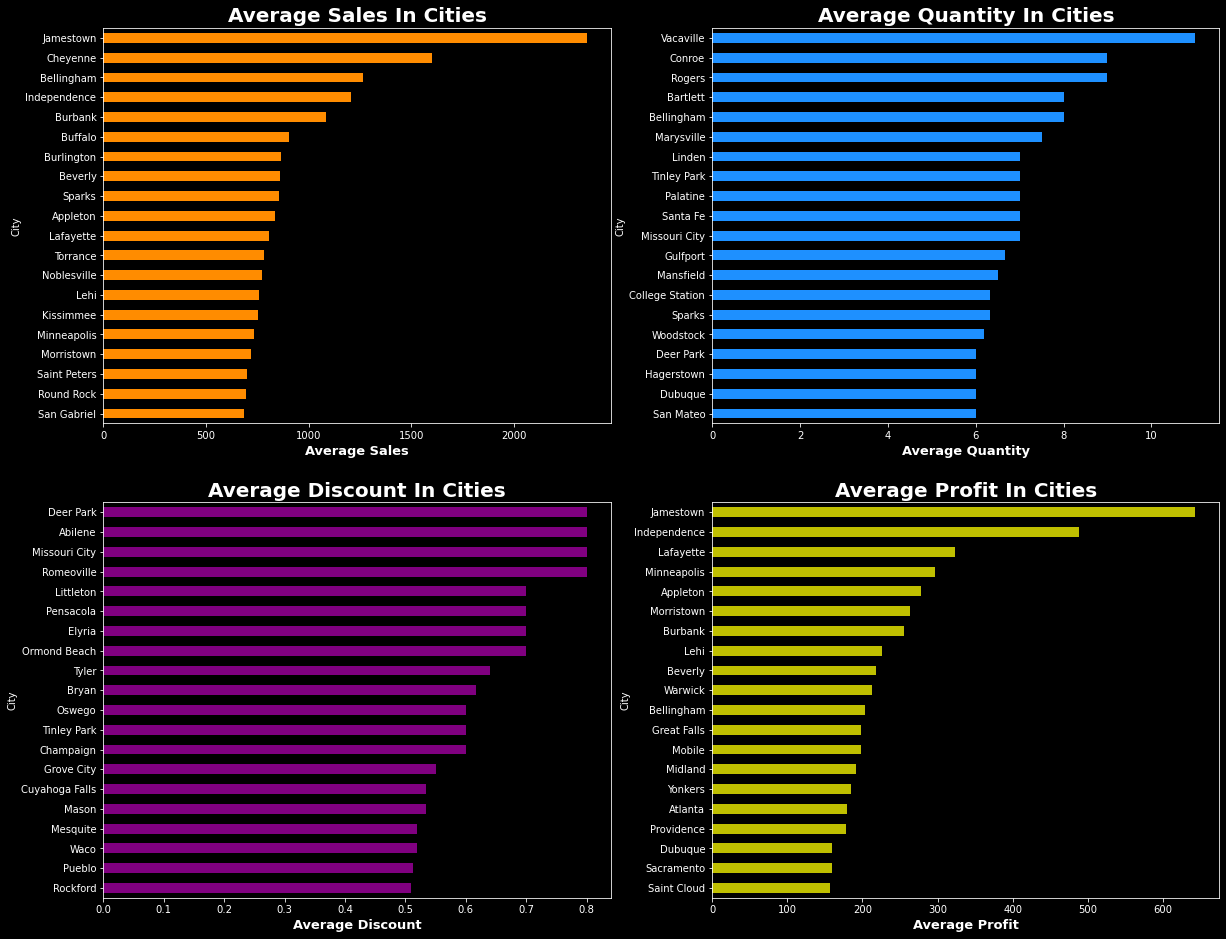

In [24]:
c = 1
colors = ["darkorange","dodgerblue","purple","y"]
x = 0
plt.figure(figsize=(20,16))
for y in numeric_data:
    plt.subplot(2,2,c)
    data[y].groupby(by=data["City"]).mean().sort_values().tail(20).plot(kind = "barh",color=colors[x%4])
    plt.title("Average {} In Cities".format(y),fontsize=20,fontweight ='bold')
    plt.xlabel("Average {}".format(y),fontweight ='bold',fontsize=13)
    c = c+1
    x = x+1    

### Average of all quantative data in top 20 States.

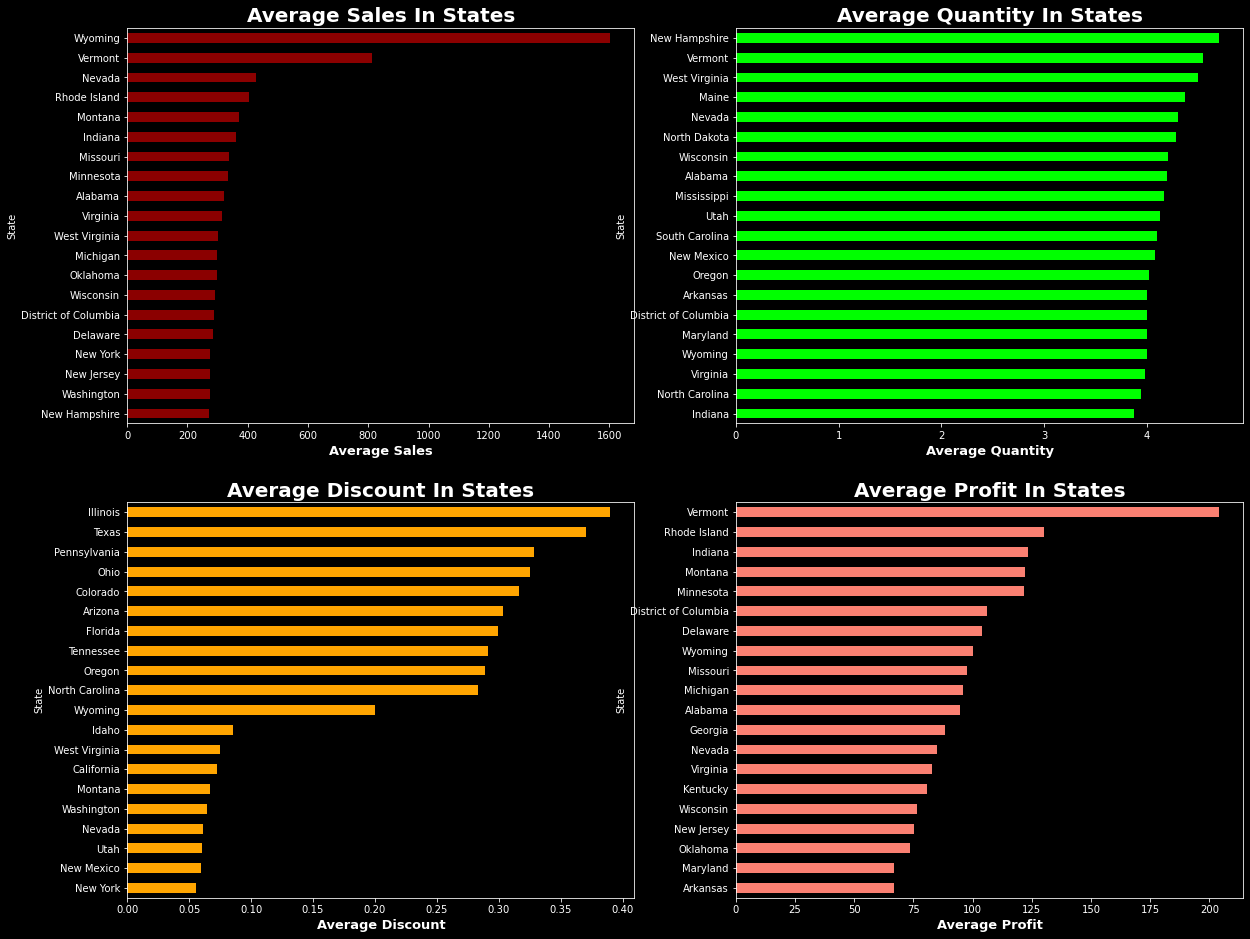

In [25]:
c = 1
colors = ["darkred","lime","orange","salmon"]
x = 0
plt.figure(figsize=(20,16))
for y in numeric_data:
    plt.subplot(2,2,c)
    data[y].groupby(by=data["State"]).mean().sort_values().tail(20).plot(kind = "barh",color=colors[x%4])
    plt.title("Average {} In States".format(y),fontsize=20,fontweight ='bold')
    plt.xlabel("Average {}".format(y),fontweight ='bold',fontsize=13)
    c = c+1
    x = x+1    

### Average of all quantative data for all types of Ship Mode.

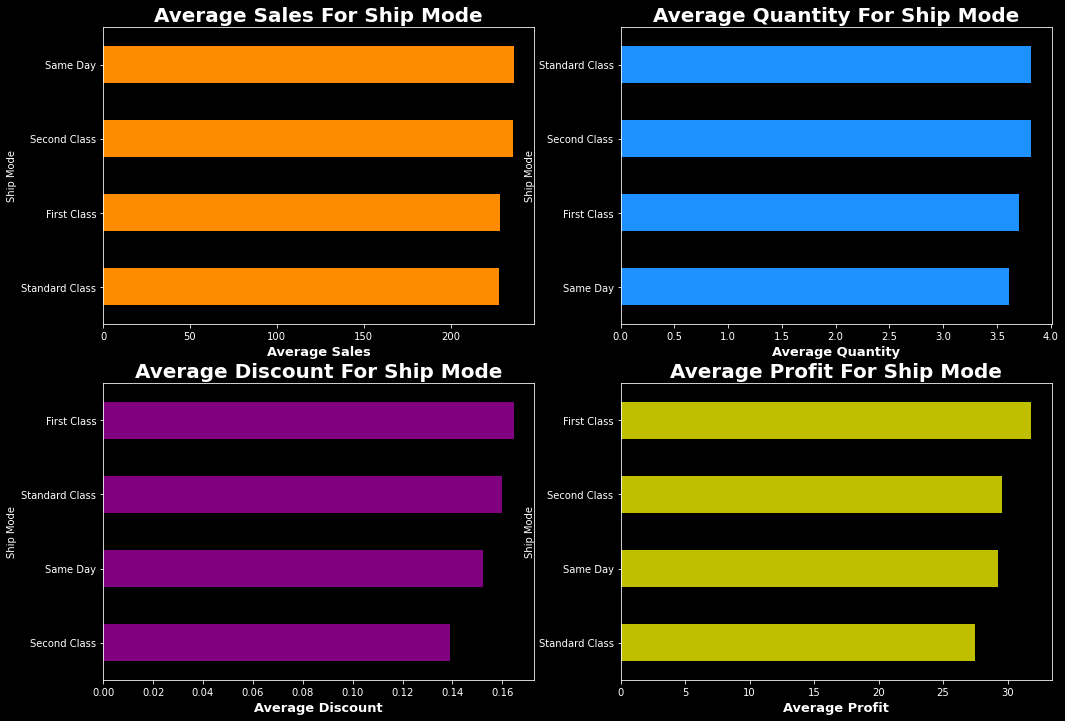

In [26]:
c = 1
colors = ["darkorange","dodgerblue","purple","y"]
x = 0
plt.figure(figsize=(17,12))
for y in numeric_data:
    plt.subplot(2,2,c)
    data[y].groupby(by=data["Ship Mode"]).mean().sort_values().tail(20).plot(kind = "barh",color=colors[x%4])
    plt.title("Average {} For Ship Mode".format(y),fontsize=20,fontweight ='bold')
    plt.xlabel("Average {}".format(y),fontweight ='bold',fontsize=13)
    c = c+1
    x = x+1    

### Average of all quantative data for all type of Segments.

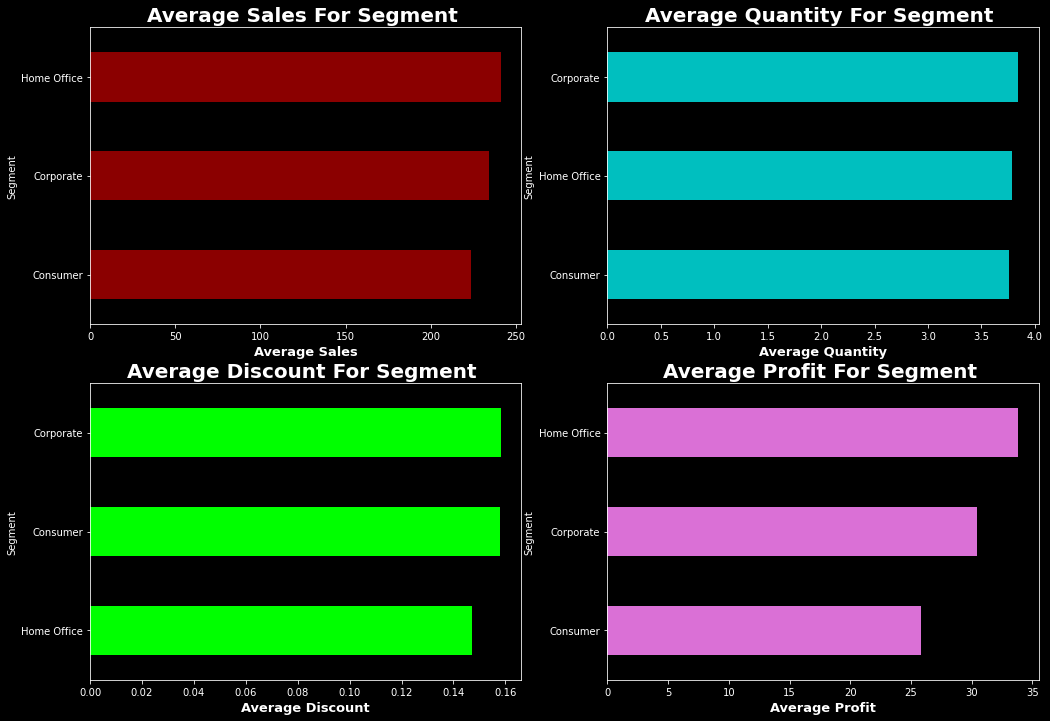

In [27]:
c = 1
colors = ["darkred","c","lime","orchid"]
x = 0
plt.figure(figsize=(17,12))
for y in numeric_data:
    plt.subplot(2,2,c)
    data[y].groupby(by=data["Segment"]).mean().sort_values().tail(20).plot(kind = "barh",color=colors[x%4])
    plt.title("Average {} For Segment ".format(y),fontsize=20,fontweight ='bold')
    plt.xlabel("Average {}".format(y),fontweight ='bold',fontsize=13)
    c = c+1
    x = x+1    

### Average of all quantative data for different regions.

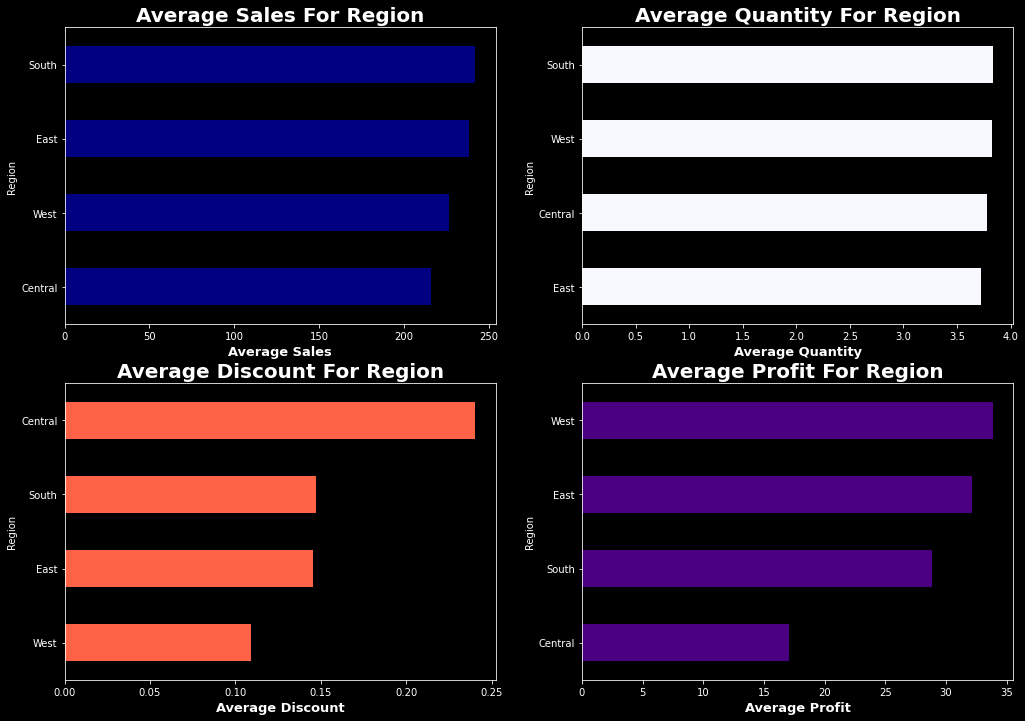

In [28]:
c = 1
colors = ["navy","ghostwhite","tomato","indigo"]
x = 0
plt.figure(figsize=(17,12))
for y in numeric_data:
    plt.subplot(2,2,c)
    data[y].groupby(by=data["Region"]).mean().sort_values().tail(20).plot(kind = "barh",color=colors[x%4])
    plt.title("Average {} For Region".format(y),fontsize=20,fontweight ='bold')
    plt.xlabel("Average {}".format(y),fontweight ='bold',fontsize=13)
    c = c+1
    x = x+1    

In [29]:
### Average of all quantative data for all Categories.

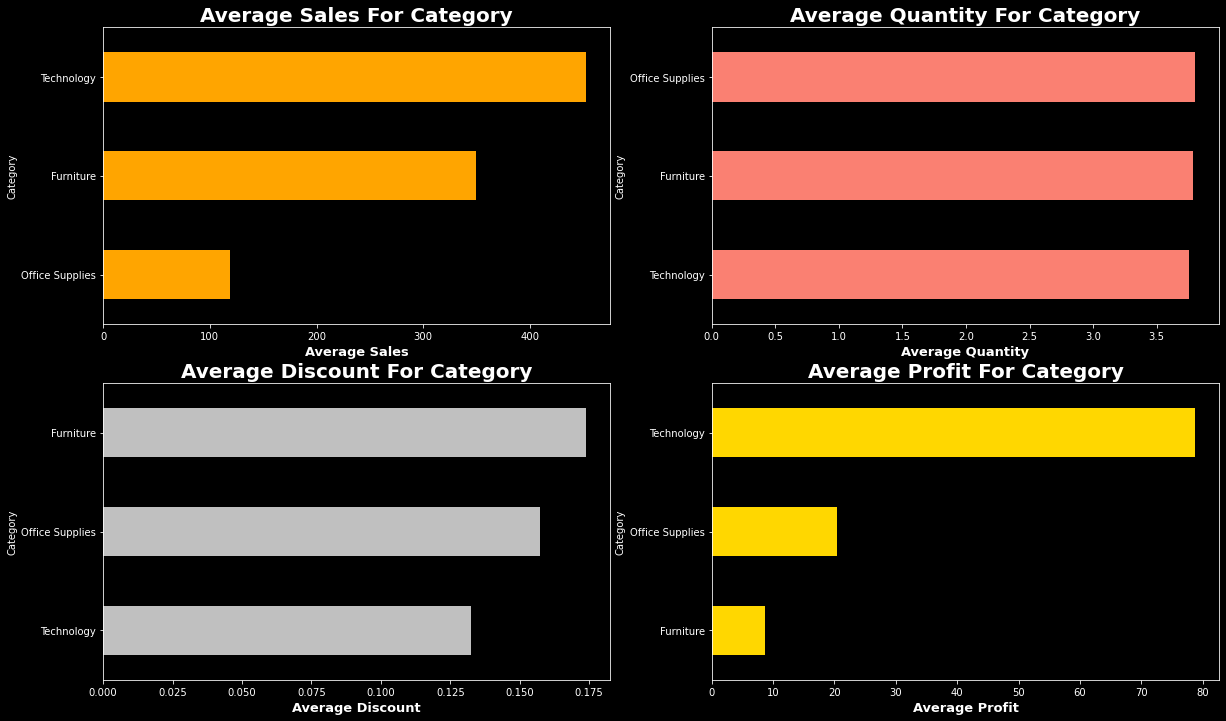

In [30]:
c = 1
colors = ["orange","salmon","silver","gold"]
x = 0
plt.figure(figsize=(20,12))
for y in numeric_data:
    plt.subplot(2,2,c)
    data[y].groupby(by=data["Category"]).mean().sort_values().tail(20).plot(kind = "barh",color=colors[x%4])
    plt.title("Average {} For Category".format(y),fontsize=20,fontweight ='bold')
    plt.xlabel("Average {}".format(y),fontweight ='bold',fontsize=13)
    c = c+1
    x = x+1    

### Average of all quantative data for all Sub-Categories.

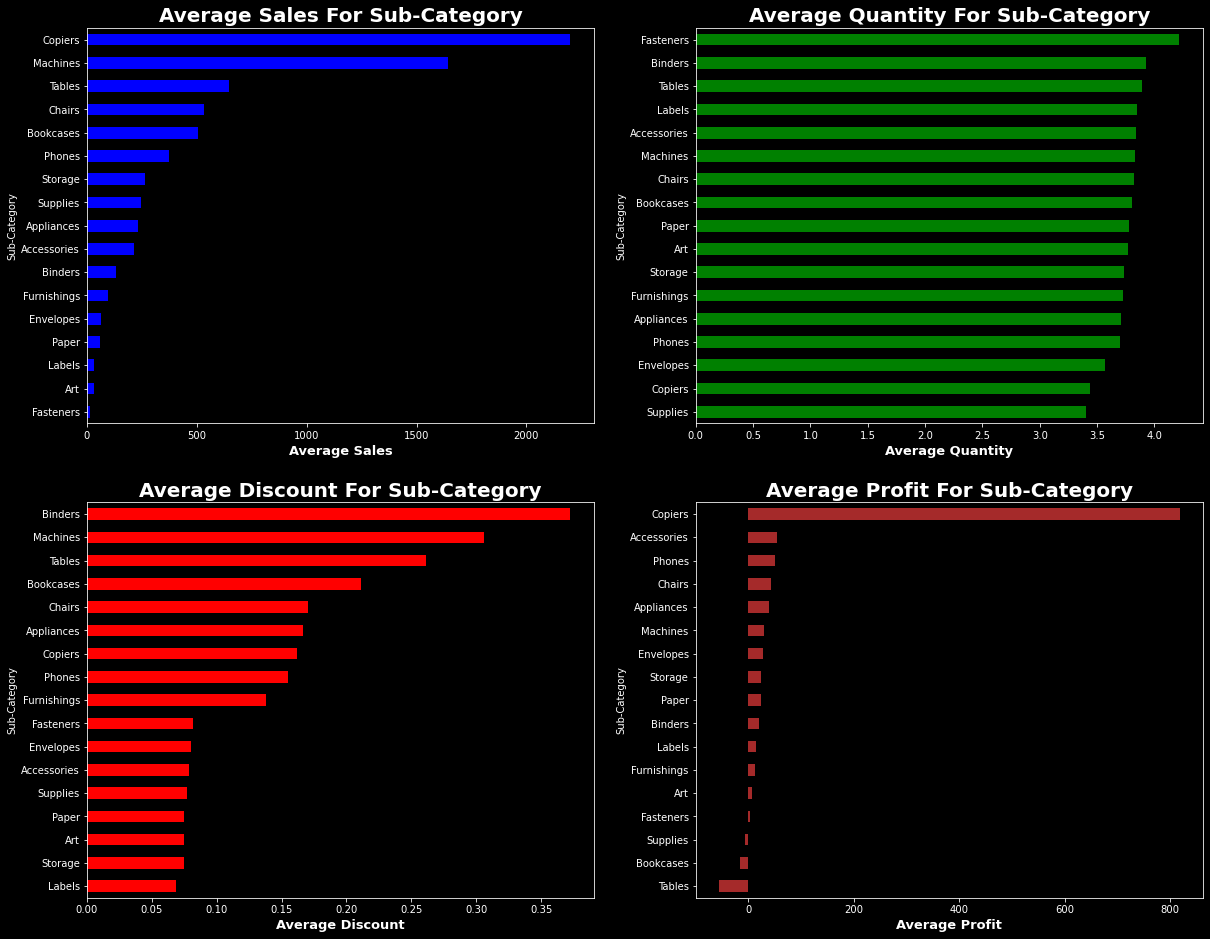

In [31]:
c = 1
colors = ["b","g","r","brown"]
x = 0
plt.figure(figsize=(20,16))
for y in numeric_data:
    plt.subplot(2,2,c)
    data[y].groupby(by=data["Sub-Category"]).mean().sort_values().tail(20).plot(kind = "barh",color=colors[x%4])
    plt.title("Average {} For Sub-Category".format(y),fontsize=20,fontweight ='bold')
    plt.xlabel("Average {}".format(y),fontweight ='bold',fontsize=13)
    c = c+1
    x = x+1    

## Multivariate Analysis.

### Comparing all cities for best sales average for corresponding States.

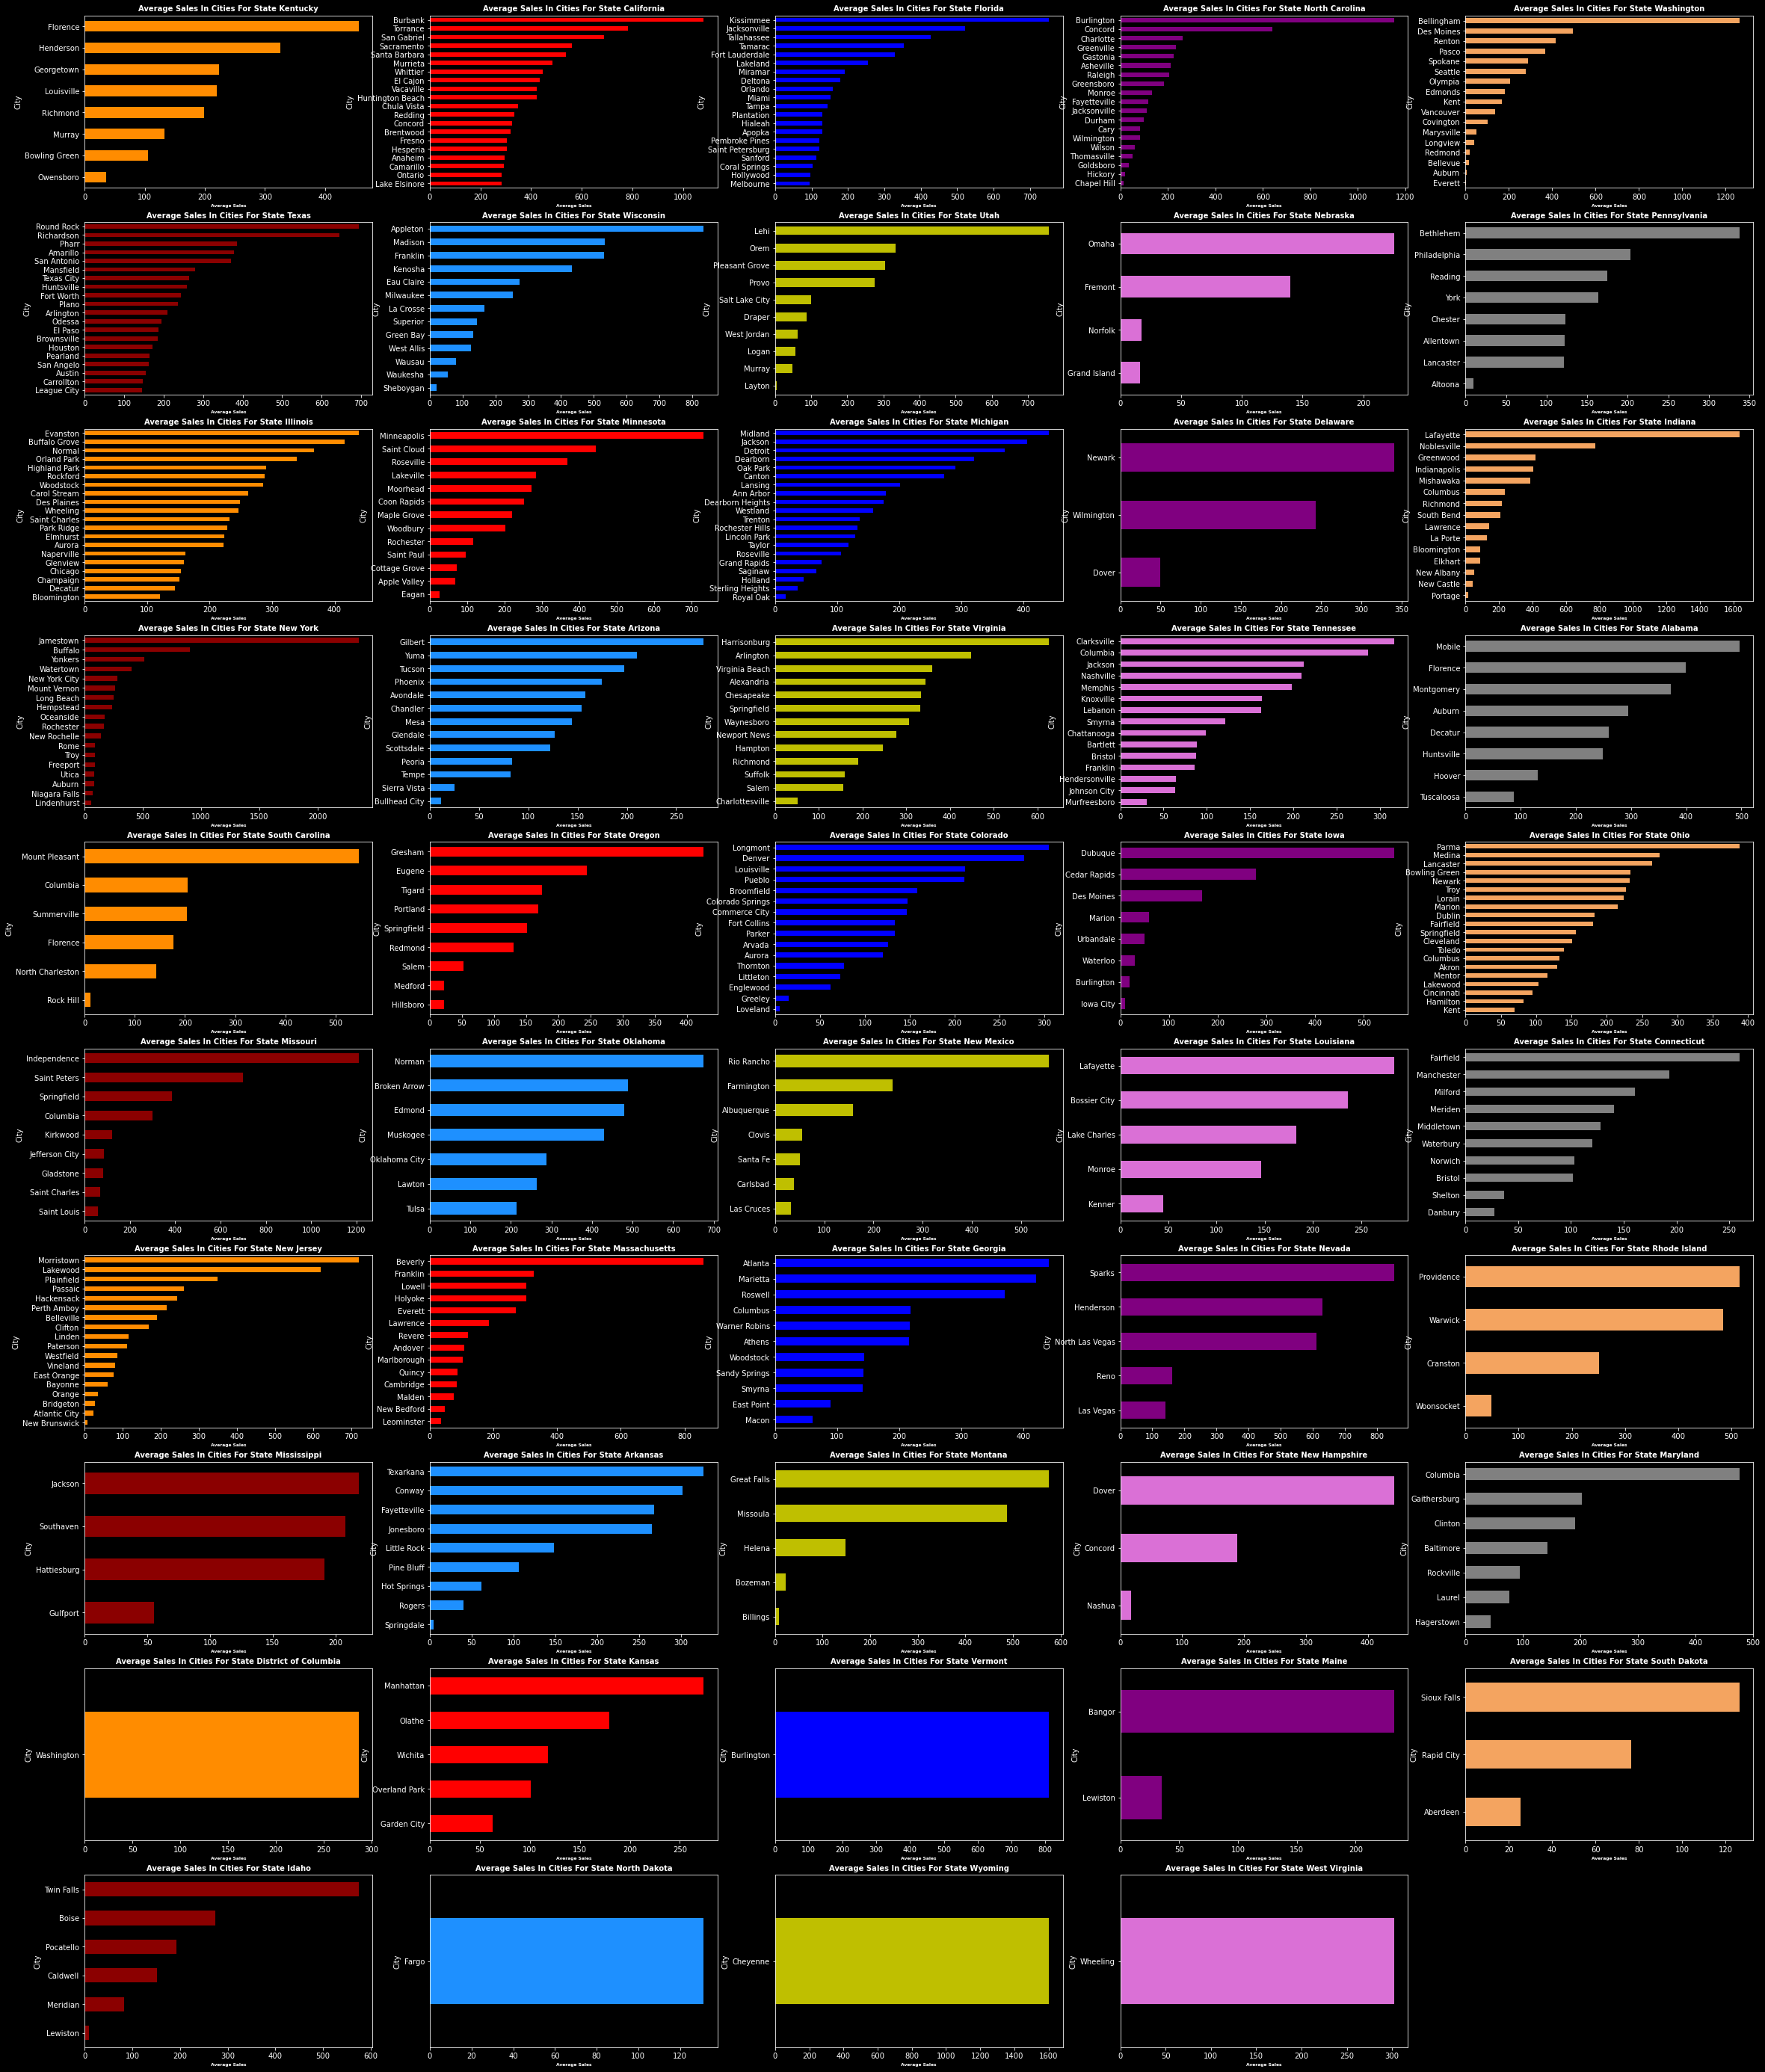

In [32]:
cl = ["darkorange","r","b","purple","sandybrown","darkred","dodgerblue","y","orchid","grey"]
x = 0
c = 1
plt.figure(figsize=(40,50))
for i in data["State"].unique():
    team = data[data["State"]==i]
    plt.subplot(10,5,c)
    team["Sales"].groupby(by=team["City"]).mean().sort_values().tail(20).plot(kind = "barh",color=cl[x%10])
    plt.title("Average Sales In Cities For State {}".format(i),fontsize=10,fontweight ='bold')
    plt.xlabel("Average Sales",fontweight ='bold',fontsize=6)
    c = c+1
    x = x+1

### Comparing all cities for best Quantity average for corresponding States.

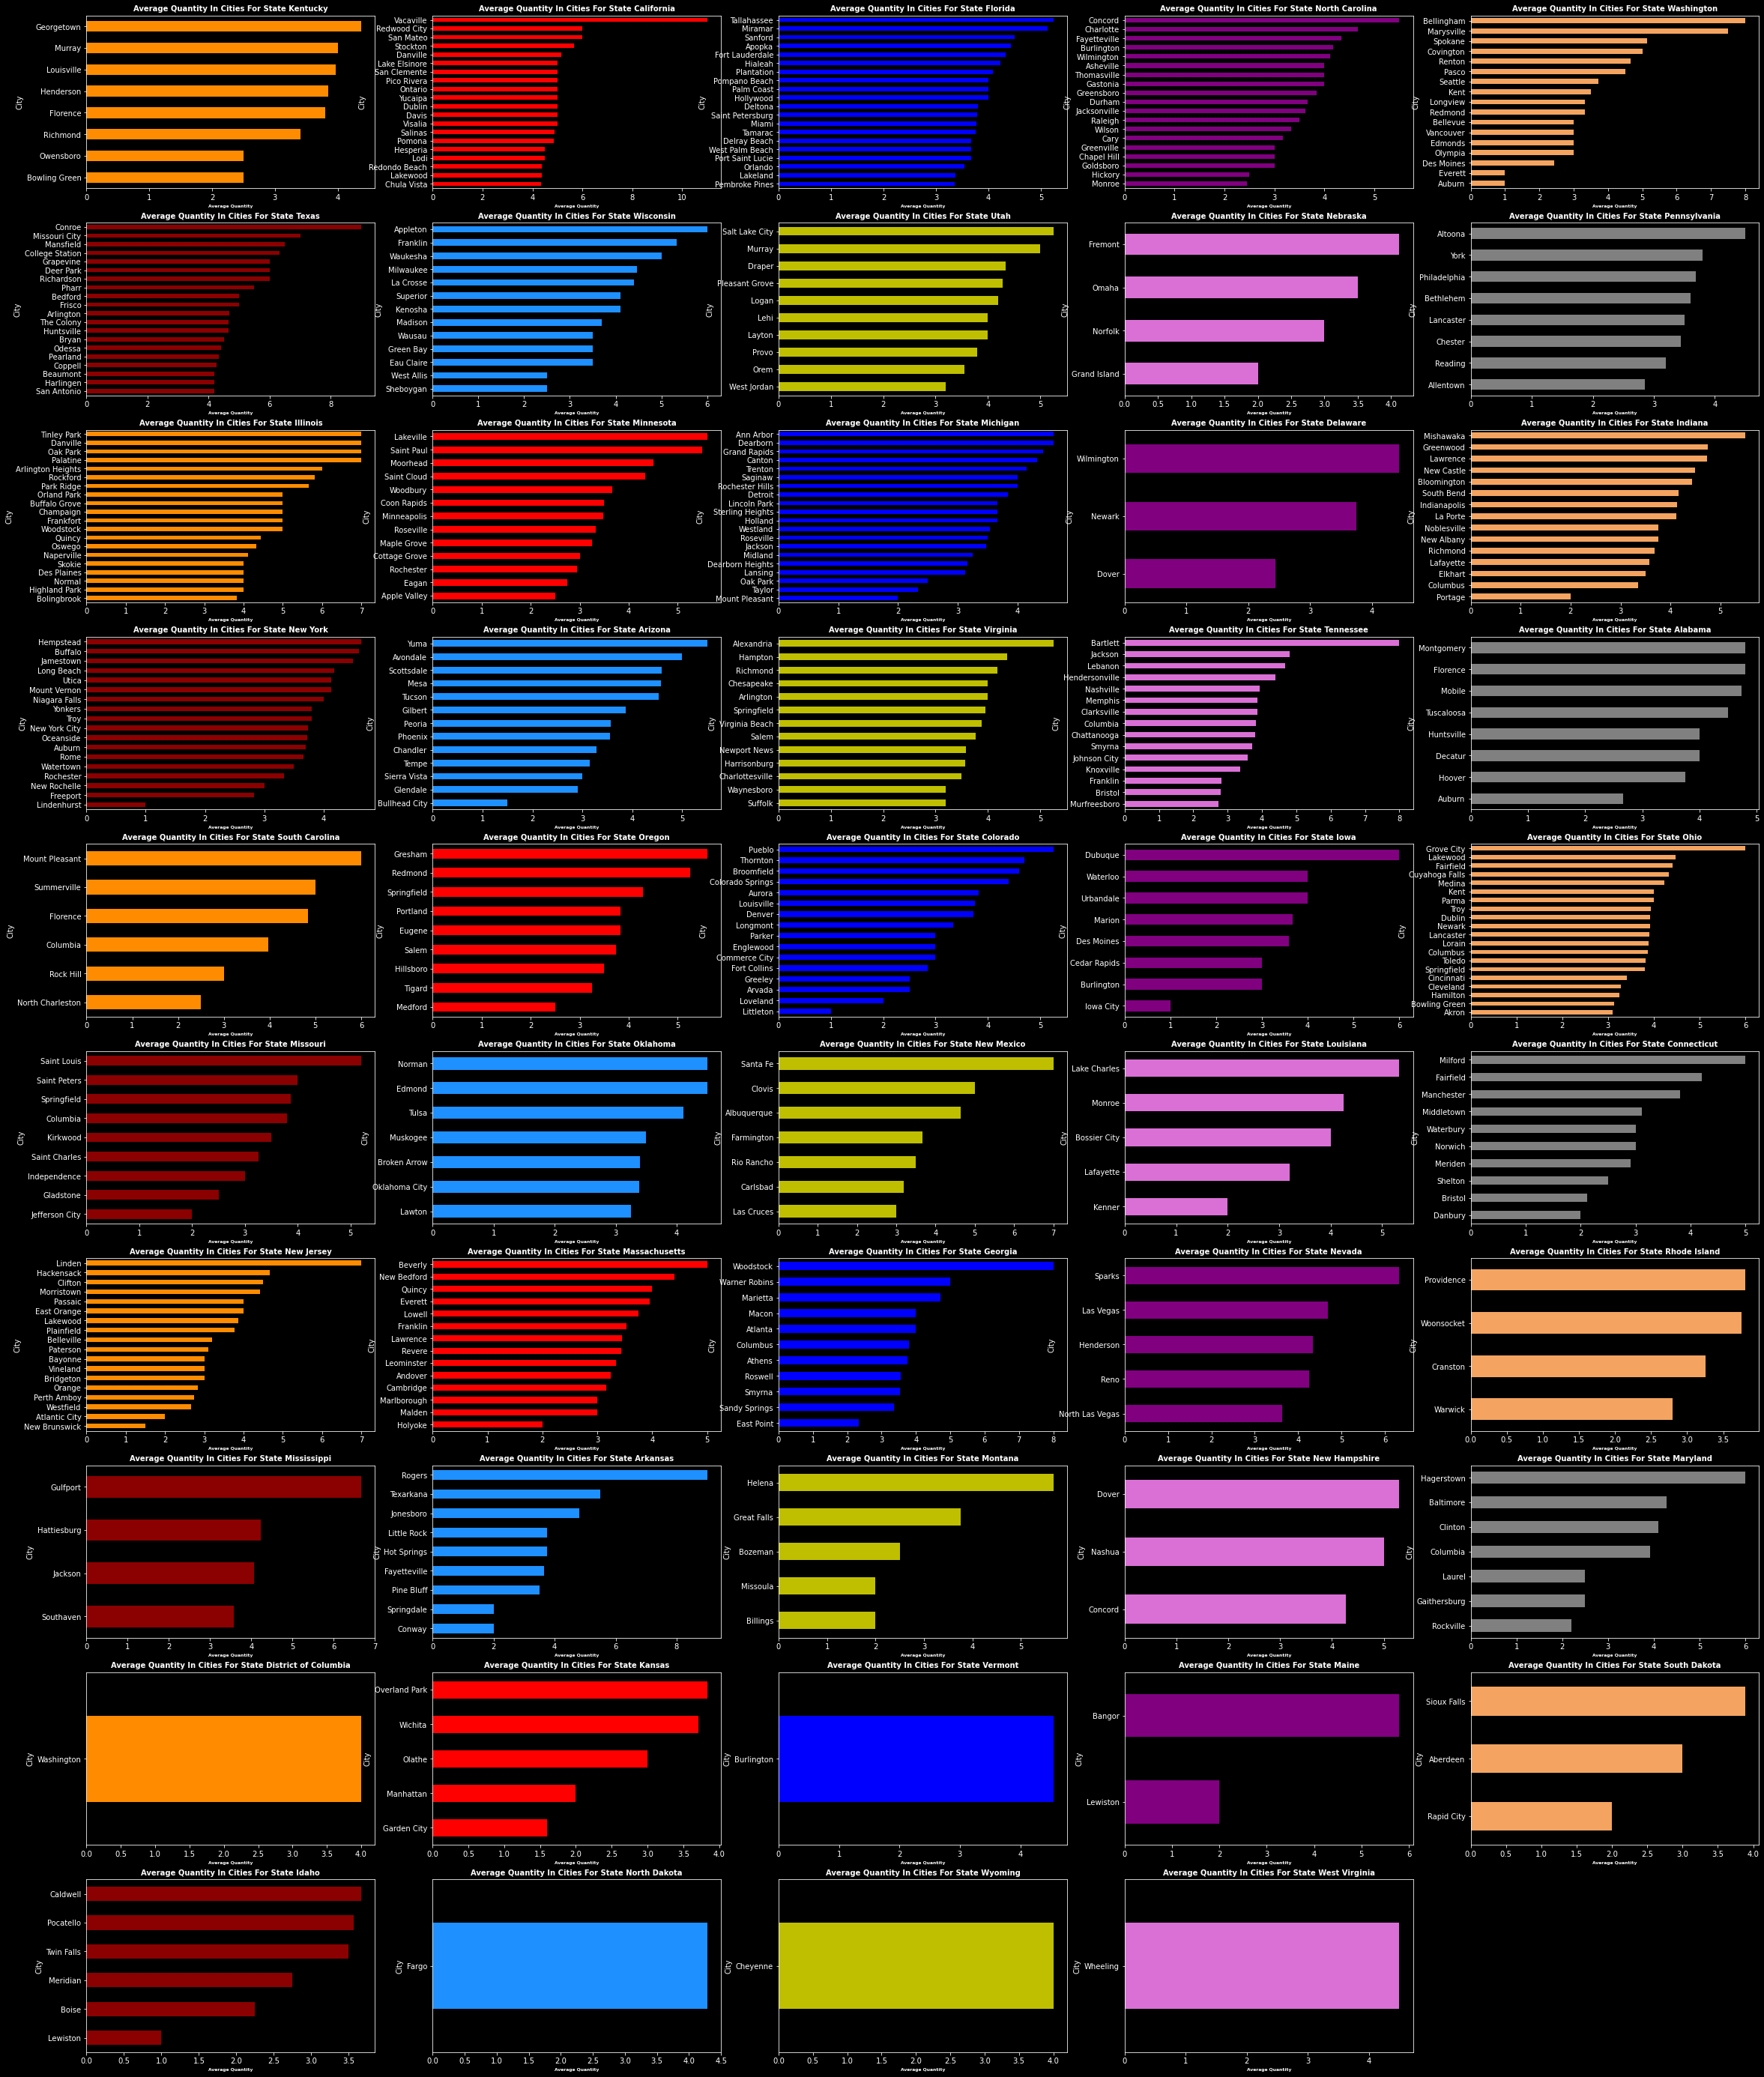

In [33]:
cl = ["darkorange","r","b","purple","sandybrown","darkred","dodgerblue","y","orchid","grey"]
x = 0
c = 1
plt.figure(figsize=(40,50))
for i in data["State"].unique():
    team = data[data["State"]==i]
    plt.subplot(10,5,c)
    team["Quantity"].groupby(by=team["City"]).mean().sort_values().tail(20).plot(kind = "barh",color=cl[x%10])
    plt.title("Average Quantity In Cities For State {}".format(i),fontsize=10,fontweight ='bold')
    plt.xlabel("Average Quantity",fontweight ='bold',fontsize=6)
    c = c+1
    x = x+1

### Comparing all cities for best discount average for corresponding States.

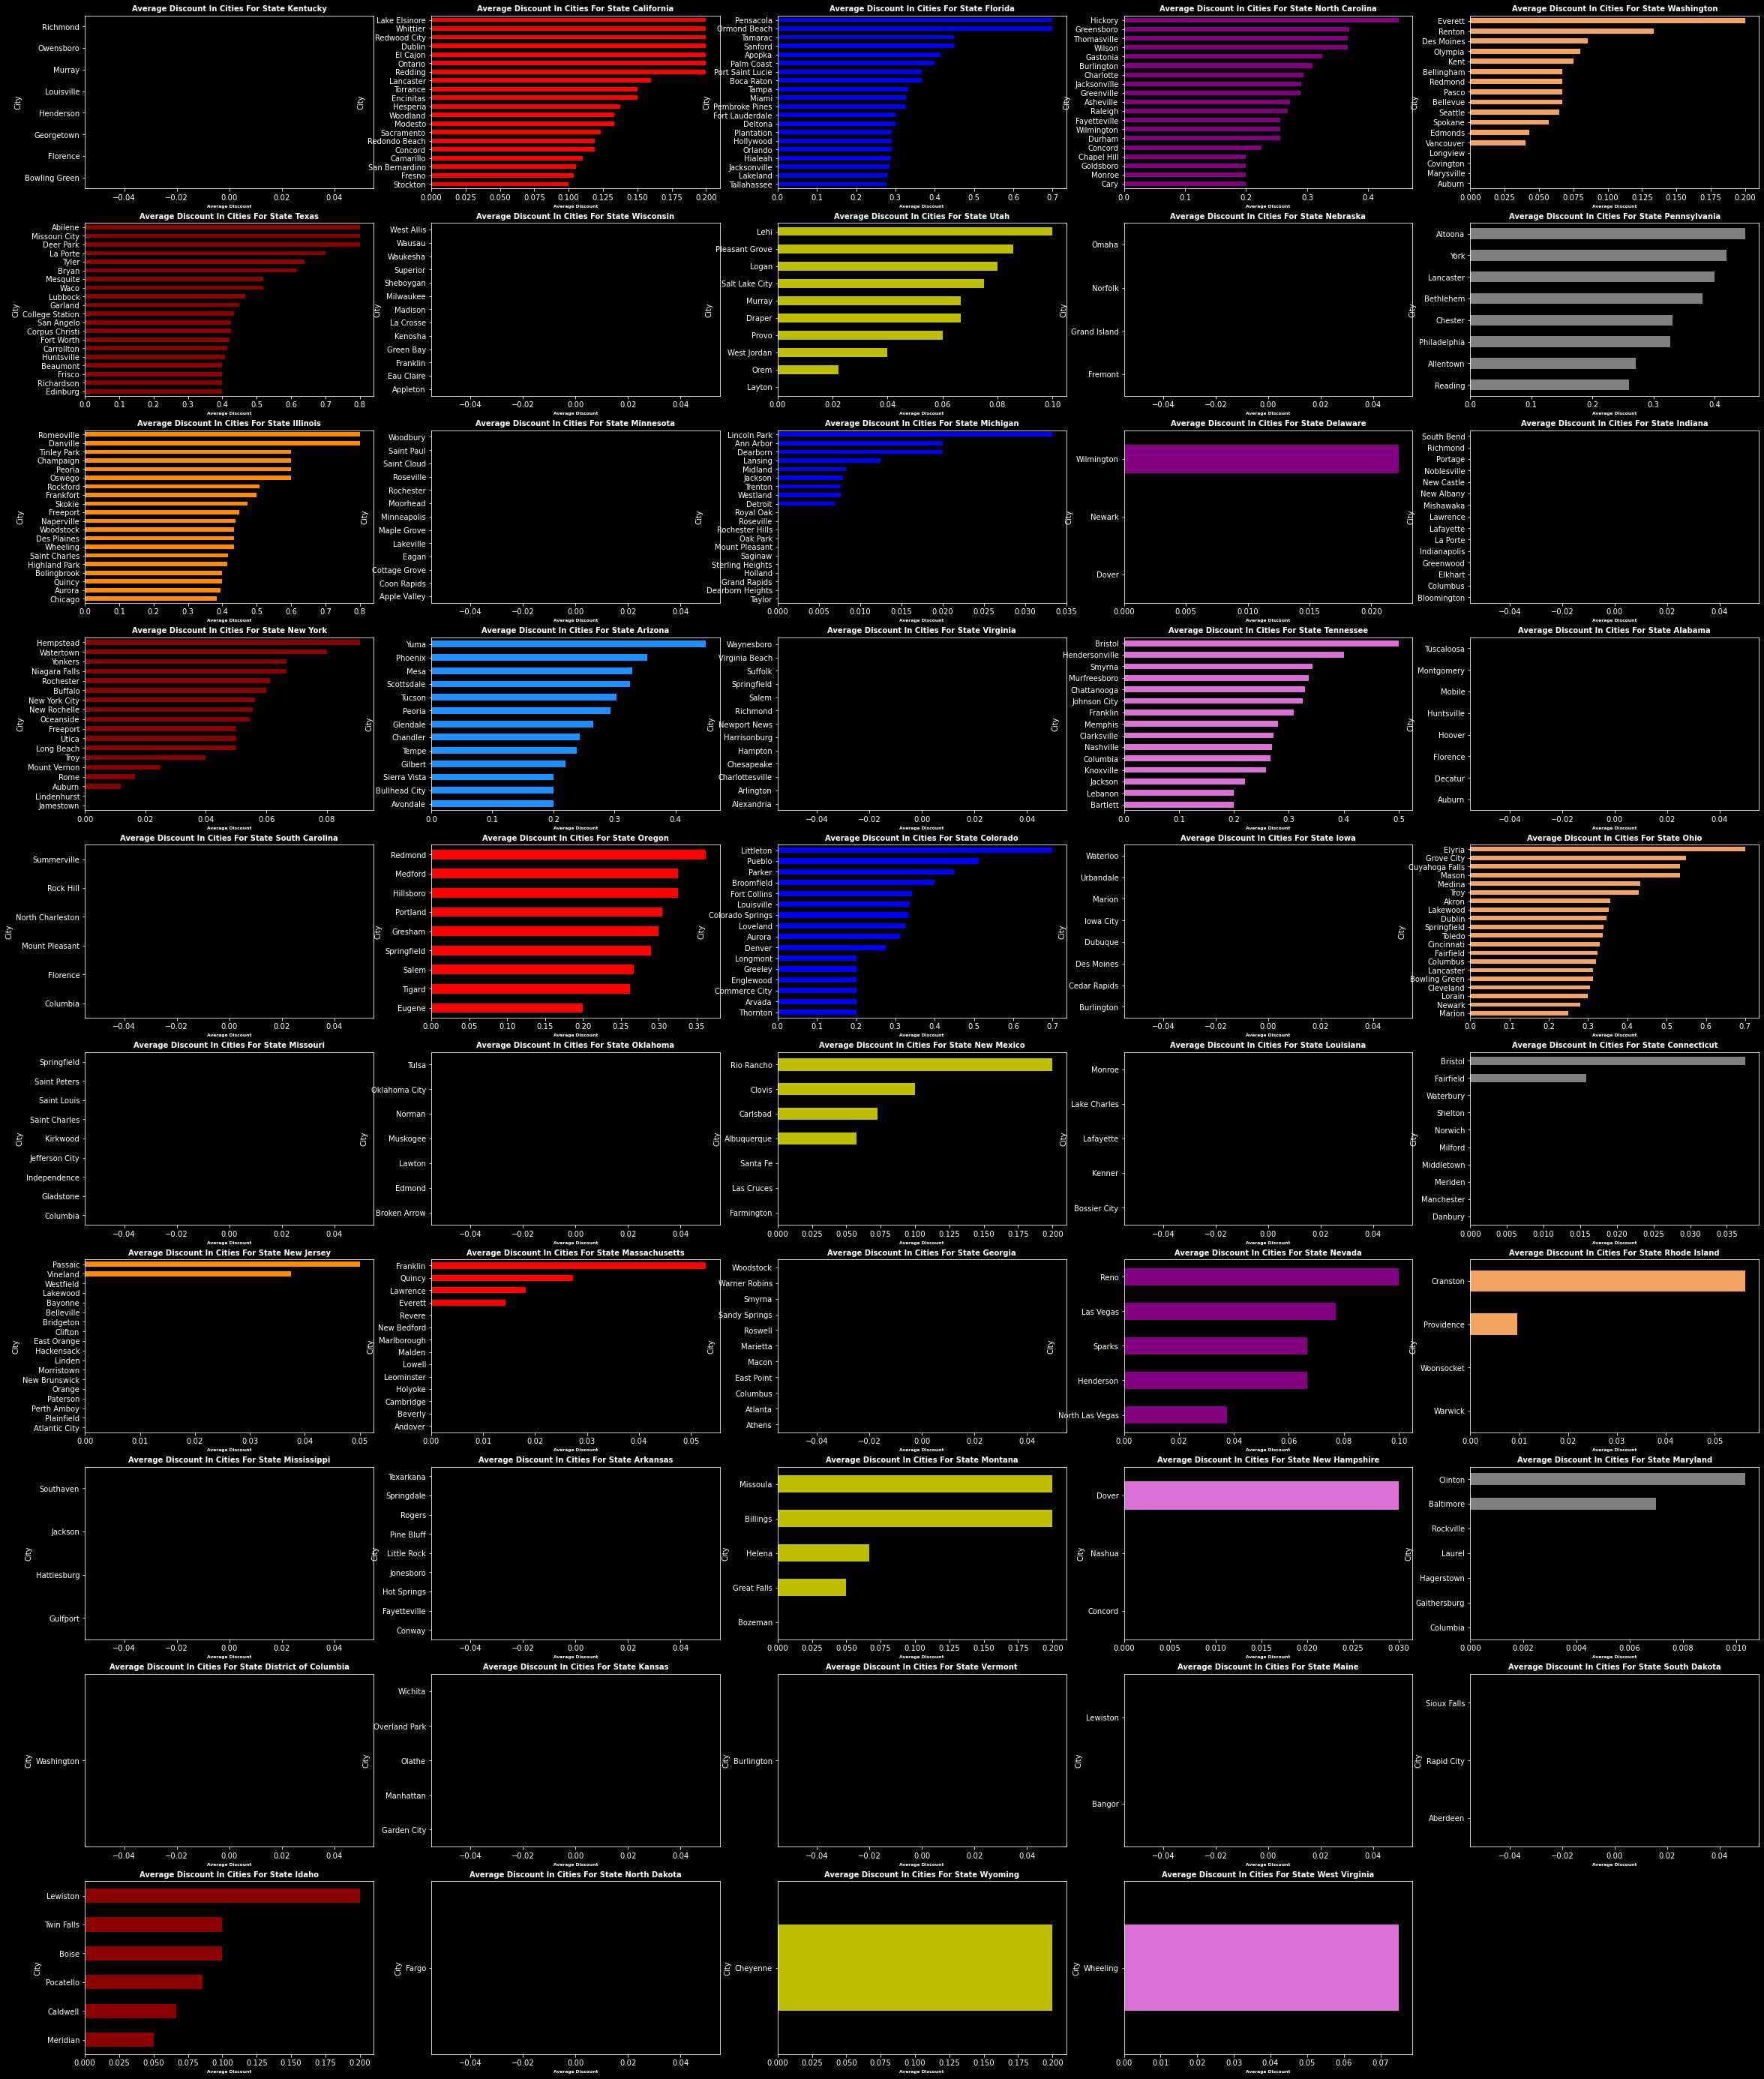

In [34]:
cl = ["darkorange","r","b","purple","sandybrown","darkred","dodgerblue","y","orchid","grey"]
x = 0
c = 1
plt.figure(figsize=(40,50))
for i in data["State"].unique():
    team = data[data["State"]==i]
    plt.subplot(10,5,c)
    team["Discount"].groupby(by=team["City"]).mean().sort_values().tail(20).plot(kind = "barh",color=cl[x%10])
    plt.title("Average Discount In Cities For State {}".format(i),fontsize=10,fontweight ='bold')
    plt.xlabel("Average Discount",fontweight ='bold',fontsize=6)
    c = c+1
    x = x+1

### Comparing all cities for best Profit average for corresponding States.

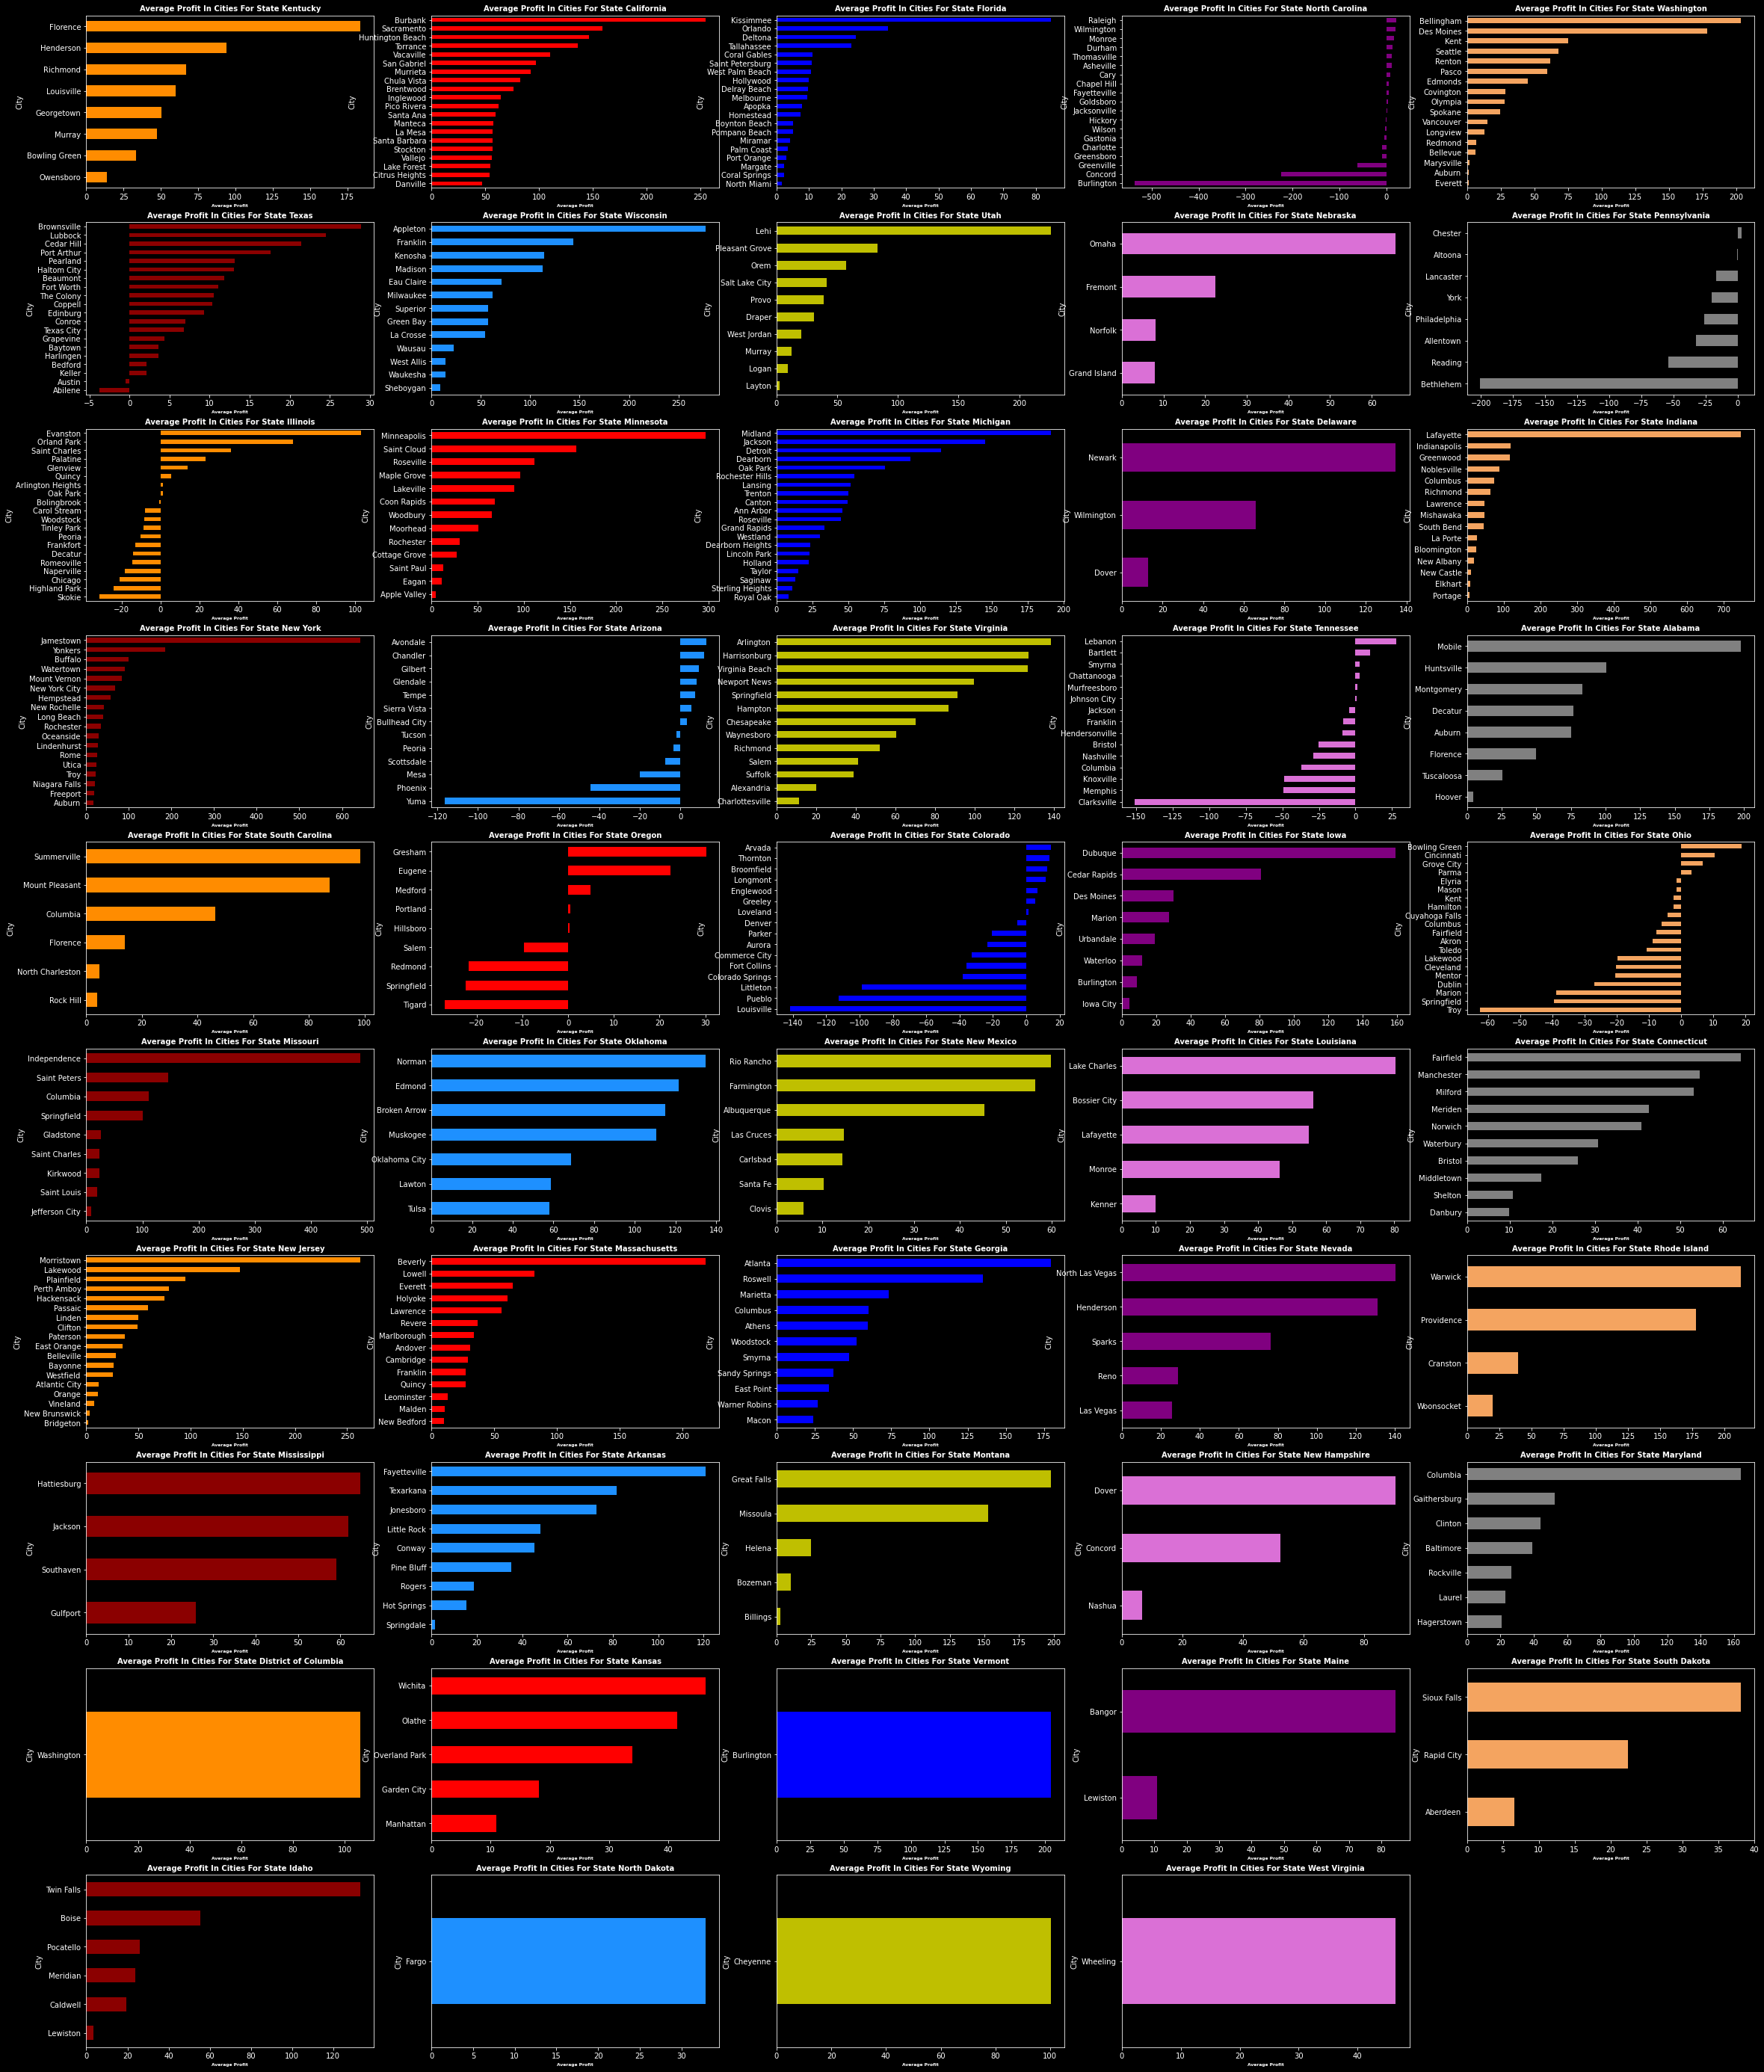

In [35]:
cl = ["darkorange","r","b","purple","sandybrown","darkred","dodgerblue","y","orchid","grey"]
x = 0
c = 1
plt.figure(figsize=(40,50))
for i in data["State"].unique():
    team = data[data["State"]==i]
    plt.subplot(10,5,c)
    team["Profit"].groupby(by=team["City"]).mean().sort_values().tail(20).plot(kind = "barh",color=cl[x%10])
    plt.title("Average Profit In Cities For State {}".format(i),fontsize=10,fontweight ='bold')
    plt.xlabel("Average Profit",fontweight ='bold',fontsize=6)
    c = c+1
    x = x+1

In [36]:
HTML('''<script>initialize();</script>Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.''')